# Predicting Diabetes Outcome in Female Pima Indians
## STAT 301 - Final Group Report
#### By Andrea Jackman, Aarya Gokhale, Ethan Dsouza, and Preran Reddy Kopula

## Introduction

### Overview:
Diabetes is a severe health challenge for our species, with significant implications for affected individuals. Diabetes is a common endocrine disease resulting in high blood sugar from an inability to produce insulin. Early diagnosis and interventions are needed to mitigate the long term complications associated with diabetes such as heart disease, kidney damage, and nerve damage. One demographic group with a particularly high prevalence of diabetes is the Pima Indian population.

### Data description
We use a dataset used sourced by "whenamancodes" from the National Institute of Diabetes and Digestive and Kidney Diseases. It is curated to aid in the diagnosis of diabetes among this demographic group. This dataset focuses on female patients of Pima Indian heritage who are at least 21 years old.

### Source: 
Kaggle, https://www.kaggle.com/datasets/whenamancodes/predict-diabities/
This data includes a range of diagnostic measurements taken from individuals, which serve as a basis for predicting the presence of diabetes.

### Collection
The data has been selected from a larger database under specific constraints to provide insights into diabetes occurrence in the selected demographic.

### Variable description
`Pregnancies` - Number of times pregnant \
`Glucose` - Blood glucose concentration (mmol/L) \
`BloodPressure` - Diastolic blood pressure (mmHg) \
`SkinThickness` - Skin fold thickness (mm) \
`Insulin` - insulin levels in the body (mIU/L) \
`BMI` - Body mass index (kg/$m^2$) \
`DiabetesPedigreeFunction` - Diabetes pedigree function (the probability of developing diabetes based on family history) \
`Age` - years alive \
`Outcome` - Class variable (0 or 1)

All the variables are of numeric data type

### Target Variable
Outcome:

Indicates whether the patient has diabetes (1) or not (0).
The dependent variable used for model prediction.
Considerations
We are including all the variables for the initial exploratory data analysis, certain variables may have more significance in modeling based on their correlations and impact on the outcome. The process involves evaluating each variable's contribution to the predictive model and making informed decisions about which variables to include for optimal performance.

### Questions we want to explore
- Can a predictive model be built to classify the outcome of diabetes given clinical data about a patient?
- What clinical predictors contribute most to a model that can make these predictions?


### Variables Involved
Response Variable: Outcome
Explanatory Variables: Chosen based on feature selection
The motive of our study is to build a model that can accurately predict whether an individual has diabetes or will develop diabetes. By addressing this, this research contributes to understanding of the risk factors of diabetes and aid in diabetes diagnosis. Existing literature provides us with a foundation for this analysis. For instance:

BMI and Diabetes Risk Across Ethnic Groups

1) A study published in The Lancet Diabetes & Endocrinology examined the association between BMI and the risk of type 2 diabetes across various ethnic groups in England. The research found that the BMI threshold for increased diabetes risk varies significantly among different ethnic populations. For instance, South Asian individuals exhibited a higher diabetes risk at lower BMI levels compared to White populations. This highlights the importance of considering ethnic-specific BMI cutoffs when assessing diabetes risk.

Interaction Effects in Logistic Regression Models for Health Outcomes

2) An article in the International Journal of Radiation Oncology discussed the importance of including interaction terms in logistic regression models to accurately capture the combined effects of multiple variables on health outcomes. The study emphasized that failing to account for interactions can lead to misleading conclusions, as the effect of one predictor may depend on the level of another. This highlights the importance of exploring interaction effects to fully understand the relationships between risk factors and health conditions.

## Exploratory Data Analysis

### Library Imports

In [1]:
# library imports
library(infer)
library(cowplot)
library(modelr)
library(pROC)
library(knitr)
library(tidyverse)
library(GGally)
library(repr)
library(broom)
library(leaps)
library(broom)
library(car)
library(DHARMa)
library(stats)
library(patchwork)
library(gridExtra)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘broom’


The following object is masked from ‘package:modelr’:

    bootstrap


Loading required package: carData


Attaching package: ‘car’


The following object is masked f

ERROR: Error in library(DHARMa): there is no package called ‘DHARMa’


### Reading in the data

The diabetes dataset was first loaded into Jupyter using read.csv. It was already in tidy format, so we did not need to do any transformations. We visualized the number of observations in each Outcome class with a table. This demonstrated that our data was imbalanced as there were 500 individuals without diabetes compared to 268 individuals with diabetes. We looked at the distribution of each variable with the summary() function, here we noticed a high concentration of zero values. 

In [2]:
# Read the data in
# Main developer: Andrea, Aarya, Ethan, Preran

diabetes_data <- read.csv('data/diabetes.csv')
head(diabetes_data, 6)
# the data is in tidy format already

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

### Summary Statistics

In [3]:
# Main developer: Andrea, Ethan
# Contributor: Aarya, Preran

outcome_counts = diabetes_data |>
    count(Outcome)
outcome_counts

Outcome n  
1 0       500
2 1       268

In [4]:
summary(diabetes_data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

### Data Cleaning

We further investigated the zero values by counting the number of zeros in each column. We then removed zeros where they did not make sense (BMI, glucose, and blood pressure). We removed the SkinThickness column as it had almost 30% (227/768) zeros which would have substantially decreased our sample size if cleaned. For the Glucose, BMI, and BloodPressure columns, since the number of 0 values were not too high, these values were removed from the dataset.

In [5]:
# Main developer: Andrea, Preran
# Contributor: Aarya, Ethan

# summarize the data which may be missing
zero_counts <- sapply(diabetes_data[, -which(names(diabetes_data) == "Outcome")], function(x) sum(x == 0))
zero_counts

Pregnancies                  Glucose            BloodPressure 
                     111                        5                       35 
           SkinThickness                  Insulin                      BMI 
                     227                      374                       11 
DiabetesPedigreeFunction                      Age 
                       0                        0

In [6]:
# Main developer: Andrea, Preran
# Contributor: Aarya, Ethan

# need to get rid of the missing values
diabetes_data_clean <- diabetes_data %>%
  select(-SkinThickness) %>% # drop this column because it has too many null values
  filter(Glucose != 0 & BloodPressure != 0 & BMI != 0)

# summarize the new data sizes
dim(diabetes_data_clean) # not too much of a decrease
dim(diabetes_data)

[1] 724   8

[1] 768   9

Before making some preliminary visualizations we converted Outcome to a factor.

In [7]:
# Main Contributor: Preran
diabetes_data_clean <- diabetes_data_clean %>%
  mutate(Outcome = as.factor(Outcome))

head(diabetes_data)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

### Summary Visualizations

Then, we visualized variable distributions and correlations with ggpairs(). Furthermore, we made boxplots for each variable for individuals with and without diabetes to further investigate suitable predictors.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


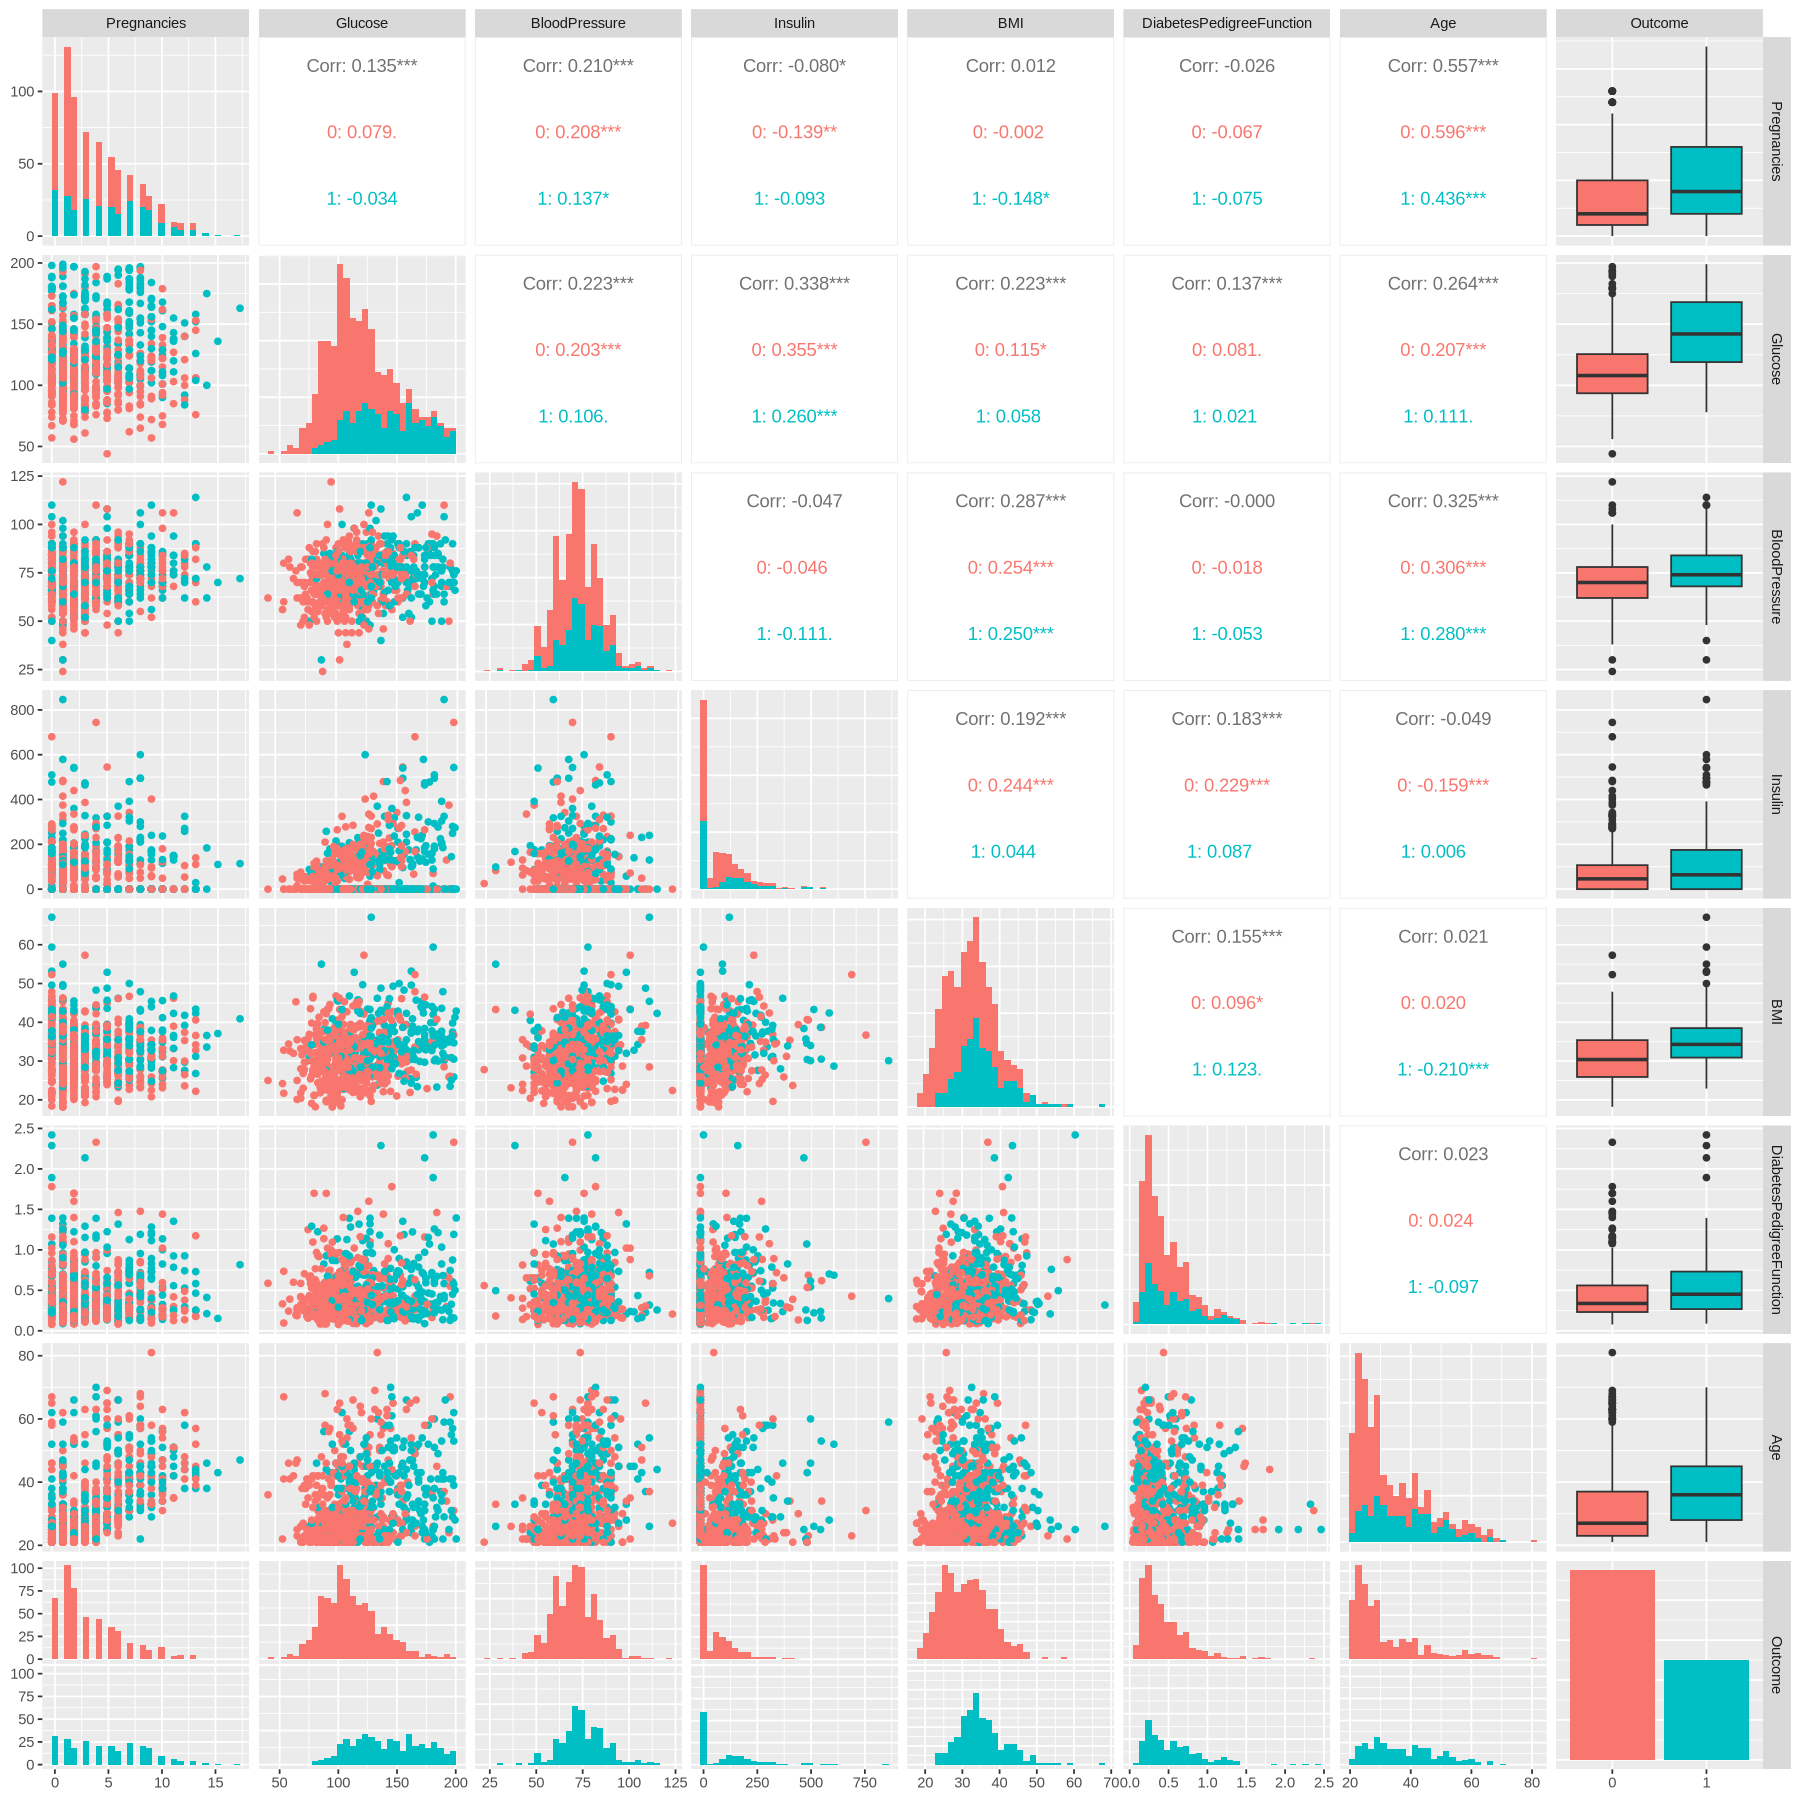

In [8]:
# Main developer: Preran
# Contributor: Ethan, Andrea, Aarya

options(repr.plot.width = 15, repr.plot.height = 15)
ggpairs(diabetes_data_clean, 
        aes(color = factor(Outcome)), 
        diag = list(continuous = wrap("barDiag"))
       )

In [9]:
# Main developer: Ethan, Andrea
# Contributor: Aarya, Preran

# set the dimensions of the plot
options(repr.plot.width = 30, repr.plot.height = 15)

plot1 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = BMI, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "BMI by Diabetes Outcome", x = "Diabetes Outcome", y = "BMI") +
  theme_minimal()

plot2 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Glucose, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Glucose by Diabetes Outcome", x = "Diabetes Outcome", y = "Glucose Blood Level (in Glucose)") +
  theme_minimal()

plot3 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Insulin, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Insulin Level by Diabetes Outcome", x = "Diabetes Outcome", y = "Insulin Level in Blood") +
  theme_minimal()

plot4 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Pregnancies, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Pregnancies by Diabetes Outcome", x = "Diabetes Outcome", y = "Pregnancies") +
  theme_minimal()

plot5 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = Age, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Age by Diabetes Outcome", x = "Diabetes Outcome", y = "Age (in Years)") +
  theme_minimal()

plot6 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = DiabetesPedigreeFunction, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Diabetes Pedigree Function \n by Diabetes Outcome", x = "Diabetes Outcome", y = "Age (in Years)") +
  theme_minimal()

plot7 <- ggplot(diabetes_data_clean, aes(x = factor(Outcome), y = BloodPressure, fill = factor(Outcome))) +
  geom_boxplot() +
  labs(title = "Blood Pressure by Diabetes \n Outcome", x = "Diabetes Outcome", y = "Age (in Years)") +
  theme_minimal()

# Combine plots in one row
combined_plot <- plot1 + plot2 + plot3 + plot4 + plot5 + plot6 + plot7 + plot_layout(nrow = 1)

# Display combined plot
combined_plot

ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `e2` to a [34m<ggplot>[39m object.


### Preliminary Model

Lastly, we made a preliminary model with all the explanatory variables and visualized how the model predictions changed with the variable. This provided some insight into the relationships between the explanatory variables and the outcome before we performed feature selection. We chose to use a multivariate logistic regression model. 
This is an appropriate method for several reasons. The outcome variable is binary, requiring a method like logistic regression to estimate the probability of a particular class (diabetes diagnosis). Logistic regression provides interpretable coefficients that quantify the relationship between predictors (e.g., glucose levels, BMI) and the log-odds of diabetes. This model assumes a linear relationship between the predictors and the log-odds, aligning well with exploratory findings (e.g., strong positive correlations observed between glucose, BMI, and diabetes outcomes).Beyond prediction, logistic regression identifies significant predictors and their impact, enhancing our understanding of key risk factors for diabetes.

In [ ]:
# Main developer: Andrea
# Contributor: Preran, Aarya, Ethan

model <- glm(Outcome ~ Age + Pregnancies + Glucose + BloodPressure + Insulin + BMI + DiabetesPedigreeFunction, data = diabetes_data_clean, family = "binomial")
diabetes_data_clean$predicted_prob <- predict(model, type = "response")

# variables to plot
variables <- c("Age", "Pregnancies", "Glucose", "BloodPressure", "Insulin", "BMI", "DiabetesPedigreeFunction")

# list to store the plots
plots <- list()

# loop and generate a plot for each variable
for (var in variables) {
  plot <- ggplot(diabetes_data_clean, aes_string(x = var, y = "predicted_prob")) +
    geom_point(aes(color = as.factor(Outcome)), alpha = 0.6) +
    geom_smooth(method = "loess", color = "black") +
    theme(plot.title = element_text(size = 24, face = "bold"),
          axis.title = element_text(size = 18),
          axis.text = element_text(size = 16),
          legend.title = element_text(size = 18),
          legend.text = element_text(size = 16)) +
    scale_color_manual(values = c("blue", "orange"),
                       labels = c("No Diabetes", "Diabetes"),
                       name = "Diabetes Outcome") +
    labs(title = paste("Predicted Probability vs.", var),
         x = var, y = "Predicted Probability")
  
  # Add the plot to the list
  plots[[var]] <- plot
}

# plot
do.call(grid.arrange, c(plots, nrow = 2))

## Methods

### Train/Test Splitting

Using the clean dataset, training and testing sub datasets were created.

In [ ]:
# Main developer: Aarya, Preran

train_indices <- sample(seq_len(nrow(diabetes_data_clean)), size = 0.8 * nrow(diabetes_data_clean))
train_data <- diabetes_data_clean[train_indices, ]
test_data <- diabetes_data_clean[-train_indices, ]

### Feature Selection

Due to the high number of variables, an additive model was generated. Using backward selection, 3 potential models were generated (see below).

In [ ]:
# Main developer: Aarya, Andrea, 
# Contributor: Preran, Ethan

model_add <- glm(formula = Outcome ~ Age + Pregnancies + Glucose + BloodPressure + Insulin + BMI + DiabetesPedigreeFunction,
      data = train_data,
      family = binomial)

# use step to do backward selection
backward_selection <- step(model_add, direction = "backward")

summary(backward_selection)

The AIC values for all models were very close. They were within 2 points to each other indicating there was no significant difference in fit between the models. Therefore, the model options given by backwards selection were all similar and there was no metric for choosing one over the other. We decided to choose the model with the most amount of variables in order to see how Outcome was affected by a majority of the variables.

### Model

In [ ]:
# Main developer: Aarya, Andrea 
# Contributor: Preran, Ethan

backward_model <- glm (Outcome ~ Age + Pregnancies + Glucose + Insulin + BMI + DiabetesPedigreeFunction,
                      data = train_data,
                      family = binomial)

backward_model

### Model Accuracy

To determine the model’s accuracy, the testing data was used to calculate the predicted probability and the predicted class for each value. Class was either 0 or 1, no predicted diabetes or presence of predicted diabetes, respectively. A confusion matrix using the predicted and actual classes was generated as well as the percentage of accuracy of the model. The model was calculated to be 75.86 % accurate. Lastly, the model’s accuracy was determined using an additional metric with an ROC curve. 

In [ ]:
# Main developer: Aarya
# Contributor: Preran
predicted_prob = predict(backward_model, newdata = test_data, type = "response")
predicted_class = ifelse(predicted_prob > 0.5, 1, 0)

In [ ]:
# Main developer: Aarya, Preran
conf_matrix <- table(Predicted = predicted_class, Actual = test_data$Outcome) 
accuracy <- mean (predicted_class == test_data$Outcome)
roc_curve <- roc (response = test_data$Outcome,
                  predictor = predicted_prob)


tidy(conf_matrix)
accuracy

**Table 1.** Confusion matrix for model predictions.

In [ ]:
plot(roc_curve,
  print.auc = TRUE, col = "blue", lwd = 3, lty = 2,
  main = "ROC Curve for Backward Selected Model"
)

**Figure 1.** ROC curve for the model.

## Discussion

The goal of this project was to determine whether a predictive model could classify individuals as having diabetes (Outcome = 1) or not (Outcome = 0) based on a set of clinical variables. Using a logistic regression model with backward selection, we achieved an accuracy of 76.55%, indicating moderate success in predicting diabetes status. The ROC curve analysis further validated the model's performance, providing additional confidence in its predictive capabilities.

### Key Findings and Implications

Our final model retained six key predictors: Age, Pregnancies, Glucose, BMI, Insulin, and Diabetes Pedigree Function. The model achieved an accuracy of 76.55%, indicating moderate success in predicting diabetes status. As expected, Glucose levels, BMI, and Diabetes Pedigree Function were strong predictors of diabetes, aligning with existing medical research that identifies these factors as significant contributors to diabetes risk. The inclusion of Pregnancies suggests a possible relationship with gestational diabetes or other pregnancy-related factors. Age, although less significant (p = 0.128), was retained in the model, potentially indicating a trend. 

The inclusion of Insulin in the model highlights its importance in providing meaningful information about an individual's diabetes risk. However, the small effect size (negative coefficient) of Insulin in the model may reflect nuances in how Insulin interacts with other variables or potentially measurement issues in the dataset. Further investigation could clarify this relationship.

### Were Results as Expected?

The findings largely matched our expectations. Age, Glucose and BMI were anticipated to be strong predictors, given their established links to diabetes. However, the lower significance of Blood Pressure and Insulin in the final model were somewhat surprising, given their theoretical relevance to diabetes risk. This may be due to the high proportion of missing or zero values for Insulin in the dataset. 

The high false negative rate (48.9%) was unexpected and could result in individuals making misguided decisions about seeking professional help. Therefore, these results should only be used by certified professionals as a supplementary tool to complement their existing practices.

### Model Improvement

While the model's accuracy is reasonable, we came up with the following to enhance its performance:

- **Address Data Imbalance:** The dataset was imbalanced, with significantly fewer cases of diabetes (Outcome = 1). Using techniques such as oversampling, undersampling, or SMOTE (Synthetic Minority Oversampling Technique) could improve the model's sensitivity to diabetic cases.
- **Feature Engineering:** Additional variables or transformations of existing variables, such as interaction terms or polynomial features, might capture more nuanced relationships in the data.
- **Regularization Techniques:** Applying Lasso or Ridge regression could help address multicollinearity and improve model robustness.

### Future Research Directions

- Combining this dataset with other clinical datasets or incorporating genetic information could improve predictive power.
- Machine learning techniques, such as Random Forests or Gradient Boosting Machines, may capture complex patterns that a logistic regression model cannot.
- Investigating why some variables, such as Insulin and SkinThickness, have many zero values could inform better data collection practices.

## References

1. Caleyachetty, R., Barber, T. M., Mohammed, N. I., Cappuccio, F. P., Hardy, R., Mathur, R., … Gill, P. (2021). Ethnicity-specific BMI cutoffs for obesity based on type 2 diabetes risk in England: a population-based cohort study. The Lancet Diabetes & Endocrinology, 9(7), 419–426. doi:10.1016/S2213-8587(21)00088-7

2. Zabor, E. C., Reddy, C. A., Tendulkar, R. D., & Patil, S. (2022). Logistic Regression in Clinical Studies. International Journal of Radiation Oncology, Biology, Physics, 112(2), 271–277. doi:10.1016/j.ijrobp.2021.08.007